In [119]:
import numpy as np
from numpy import *
from matplotlib import pyplot as plt

#思路：
1. 先按照你想分的类别数，随机找几个点作为每一类的中心点

2. 根据你采用的距离计算方式（欧氏距离、曼哈顿距离等），将所有点按照最近邻的方式归到这几个中心点的类别中去

3. 分类完毕后，根据每一类的所有点，来重新计算一个新的中心点来替代上一次使用的中心点

4. 重复2,3，直到中心点不再变化，称之为收敛的时候，就完成了分类


# 生成随机二维数组文件

In [121]:
#fro,to分别为数据的起始范围，len为数据量，得稍微取大一点才会取得不错的效果，此次取40。
def ge_Data():
    fro=1
    to=4
    len=40
    dataSet = [[random.uniform(fro,to) for j in range(1, 3)] for i in range(1, len+1)]
    return dataSet

# 生成k个随机中心点，k为希望得到的类别数，此次取4.

In [123]:
def randCent(dataSet,k):
    fro=1
    to=4
    ndims=array(dataSet).shape[1]
    centsArray=(to-fro)*np.random.random((k,ndims))+fro
    return centsArray

# 计算欧氏距离的函数

In [124]:
def disEucli(vecA,vecB):
    return sqrt(sum(power(vecA-vecB,2)))

In [125]:
def kMeans(dataSet,k):
    num = array(dataSet).shape[0]
    # 建立一个数组clusterAssignmentArray存储每个点的类别和与对应中心点的欧氏距离
    clusterAssignmentArray = zeros((num,2))
    centsArray = randCent(dataSet,k)
    change= True
    while change:
        change=False
        for i in range(num):
            minIndex=-1
            minDist=inf
            for j in range(k):
                dis=disEucli(array(dataSet[i]),centsArray[j])
                if dis>0 and dis<minDist:
                    minDist=dis
                    minIndex=j
            if clusterAssignmentArray[i][0] != minIndex:
                clusterAssignmentArray[i] = [minIndex,minDist]
                change=True
        for i in range(k):
            temp=[]
            for j in range(num):
                if clusterAssignmentArray[j][0]==i:
                    temp.append(dataSet[j])
                centsArray[i,:]=mean(temp,axis=0)
                #print(centsArray)
    return centsArray,clusterAssignmentArray

D:\AnacondaInstallation\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\AnacondaInstallation\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


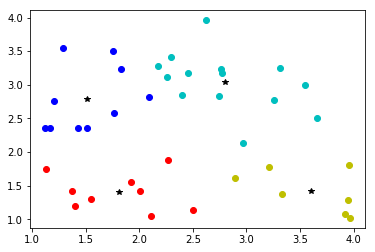

In [139]:
if __name__ == "__main__":
    k=4
    len=40
    dataSet=ge_Data()
    dataMat=mat(dataSet)
    myCentres,myDistribution=kMeans(dataMat,k)
    plt.plot(myCentres[:,0].tolist(),myCentres[:,1].tolist(),'k*')
    
    colourList = ['bo', 'ro', 'yo', 'co']
    for i in range(k):
        centX=[] 
        centY=[]
        for j in range(len):
            if myDistribution[j].tolist()[0] == i:
                centX.append(dataMat[j].tolist()[0][0])
                centY.append(dataMat[j].tolist()[0][1])
        plt.plot(centX, centY, colourList[i])